# What's the best DS content to write about?

Questions on the site include how-to's, conceptual questiosns uch as the differences between methods, and peer-review-style questions that ask answerers to find a mistake or inconsistency in the code. 

The homepage divides into questions, tags, users, and unanswered questions. Tags and unanswered questions could definitely be useful to answer our question of 'What's the best content to write about?'.

Each post includes asked date, last time active, # views, # answers, and reputation score. 

Looking through DSSE's data model, useful tables include posts, comments, and tags. Specifically, the posts table includes several columns that count views, answers, and favorites. Questions and Answers are by far the most popular posts, so we'll download a dataset of them and explore the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])

In [2]:
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


We see that there are no null values for any column besides FavoriteCount, which has 7432 null columns (likely unfavorited posts that can be changed to 0 value). 

Column types are valid aside from FavoriteType, which does not need to be a float. 
Additionally we can make the CreationDate a datetime type by reimporting our data with parse_dates on the column.

Being that tags are concentrated in one column, we could create additional tag columns (tag1, tag2 etc) to seperate them for iteration. For now, we will eliminate the <> around them so they can be iterated as a list. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
data['FavoriteCount'] = data['FavoriteCount'].fillna(0).astype(int)
data.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [5]:
data['Tags'] = data['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','').str.split(',')
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


We've taken care of the issues identified. 

Now we'll focus on determining popular tags: both by how many times used, and how many times each was viewed.

In [6]:
tags = []
tags_views = {}
for index, taglist in enumerate(data['Tags']):
    for innertag in taglist:
        tags.append(innertag)
        if innertag in tags_views:
            tags_views[innertag] += data['ViewCount'][index]
        else:
            tags_views[innertag] = data['ViewCount'][index]

tags= pd.Series(tags).value_counts()
tags.head(10)

machine-learning    2693
python              1814
deep-learning       1220
neural-network      1055
keras                935
classification       685
tensorflow           584
scikit-learn         540
nlp                  493
cnn                  489
dtype: int64

In [7]:
tags_views = pd.Series(tags_views).sort_values(ascending=False)
tags_views.head(10)

python              537585
machine-learning    388499
keras               268608
deep-learning       233628
pandas              201787
neural-network      185367
scikit-learn        128110
tensorflow          121369
classification      104457
dataframe            89352
dtype: int64

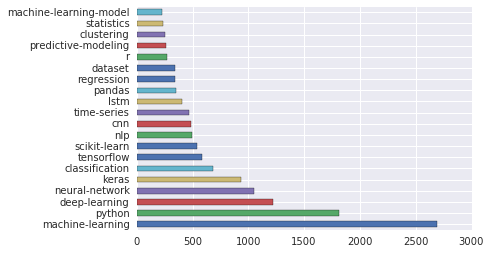

In [8]:
tags.head(20).plot(kind='barh')

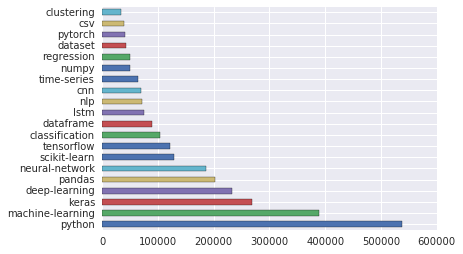

In [9]:
tags_views.head(20).plot(kind='barh')

We've sorted top tags by # times used, as well as # views for the post of each tag. Python, Machine-learning, Keras, Neural network and Deep-learning are consistent in the top 6 tags for uses and views. 

It's interesting to note that pandas is a highly-viewed tag, possibly because DS students look up lots of QA articles regarding use of pandas. By writing articles about pandas (a library in python), we can tackle two popular tags at the same time. Python is also a related tag of scikit-learn and keras. 

Keras is a neural-network library, relating it to the tag neural-network, which in turn is related to cnn and machine-learning. 

Machine-learning is in turn related to deep-learning, tensorflow, scikit-learn, keras, nlp, and cnn. 

By creating articles that encopass these nested tags, we can definitely increase popularity.

Let's try and validate our findings for longevity by tracking engagement of similar tags over time. We'll specifically be looking at if 'Deep Learning' has staying power. 

Related tags to DL will be from the list ['deep-learning', 'machine-learning', 'keras', 'nlp', 'cnn', 'tensorflow', 'scikit-learn', 'neural-network'], which all appear related after searching google for tag definitions:

In [10]:
all_questions = pd.read_csv('all_questions.csv', parse_dates = ['CreationDate'])
all_questions['Tags'] = all_questions['Tags'].str.replace('><',',').str.replace('<','').str.replace('>','').str.split(',')

all_questions.sort_values('CreationDate')

,Id,CreationDate,Tags
65,5,2014-05-13 23:58:30,[machine-learning]
66,7,2014-05-14 00:11:06,"[education, open-source]"
67,14,2014-05-14 01:25:59,"[data-mining, definitions]"
68,15,2014-05-14 01:41:23,[databases]
69,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]"
70,19,2014-05-14 03:56:20,"[bigdata, scalability, efficiency, performance]"
71,20,2014-05-14 05:37:46,"[nosql, relational-dbms]"
72,22,2014-05-14 05:58:21,"[data-mining, clustering, octave, k-means, cat..."
73,31,2014-05-14 08:38:07,"[data-mining, clustering]"
74,35,2014-05-14 09:51:54,[algorithms]


In [11]:
dl_tags = ['deep-learning', 'machine-learning', 'keras', 'nlp', 'cnn', 'tensorflow', 'scikit-learn', 'neural-network']
def dl_post(tag):
    for tags in tag:
        if tags in dl_tags:
            return 1
        else:
            return 0

all_questions['dl_related'] = all_questions['Tags'].apply(dl_post)
dl_questions = all_questions[all_questions['dl_related'] == 1].drop('dl_related', axis = 1)
dl_questions.head()

,Id,CreationDate,Tags
1,45418,2019-02-12 00:50:39,[neural-network]
3,45426,2019-02-12 04:51:49,[keras]
5,45428,2019-02-12 05:43:18,[cnn]
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]"
7,45431,2019-02-12 07:26:56,[machine-learning]


We've filtered for deep-learning tagged content only. Now we'll sort posts by quarters of a year before plotting their popularity over time. 

In [12]:
def time_period(date):
    year = date.strftime('%Y')[-2:]
    month = int(date.strftime('%m'))
    if month < 4:
        month = 'Q1'
    elif month <= 6:
        month = 'Q2'
    elif month < 10:
        month = 'Q3'
    else:
        month = 'Q4'
    return year+month

dl_questions['Quarter'] = dl_questions['CreationDate'].apply(time_period)
all_questions['Quarter'] = all_questions['CreationDate'].apply(time_period)

In [24]:
comp_table = dl_questions.groupby(['Quarter']).count().drop('20Q1')
comp_table = comp_table.drop(comp_table.columns[1:],axis=1)
comp_table['DL'] = comp_table['Id']
comp_table.drop('Id', axis=1, inplace=True)
all_questions_comp = all_questions.groupby(['Quarter']).count().drop('20Q1')
comp_table['all'] = all_questions_comp['Id']
comp_table['%'] = (comp_table['DL']/comp_table['all'])*100

In [25]:
comp_table

,DL,all,%
Quarter,,,
14Q2,48,157,30.573248
14Q3,73,189,38.624339
14Q4,81,216,37.500000
15Q1,73,190,38.421053
15Q2,106,284,37.323944
15Q3,133,311,42.765273
15Q4,149,382,39.005236
16Q1,212,516,41.085271
16Q2,200,518,38.610039


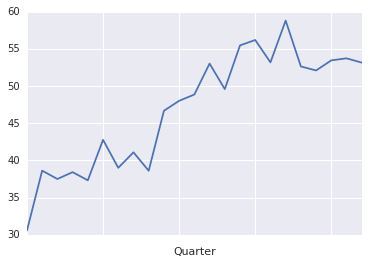

In [34]:
comp_table['%'].plot(kind='line')

We see that while DL-related posts have exploded in popularity from 14Q2 to the end of 2019, they maintain a level above 50% of all posts. Thus, our recommendation is to continue creating content related to the topic. 